In [25]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import math

In [26]:
# read the image
frame = cv2.imread("aruco_3.jpg")
frame = cv2.resize(frame,(604, 806))
# convert to gray scale image
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

In [27]:
corners

(array([[[200., 482.],
         [253., 376.],
         [389., 405.],
         [360., 525.]]], dtype=float32),)

In [28]:
cv2.imshow('image', gray)
cv2.waitKey(0)

-1

In [29]:
k=np.array([[628.15696872,0,308.88131393],[  0,630.52551993,385.34099043], [  0,0,1]])
d= np.array([[ 3.35132581e-01,-1.99496027e+00,-2.27449501e-03, 1.04656897e-03, 3.42317370e+00]])

In [30]:
(rvecs,tvecs,objectPoints) = aruco.estimatePoseSingleMarkers(corners, 0.1 , k, d)

In [31]:
objectPoints

array([[[-0.05,  0.05,  0.  ]],

       [[ 0.05,  0.05,  0.  ]],

       [[ 0.05, -0.05,  0.  ]],

       [[-0.05, -0.05,  0.  ]]], dtype=float32)

In [32]:
pt_1=np.zeros([4,1,3])
pt_1[:,0,:]=np.array([[-0.05 , 0.05  , 0.1 ],[0.05,  0.05,  0.1 ],[0.05 , -0.05  , 0.1 ],[-0.05 , -0.05  , 0.1 ]])
cube_points=np.concatenate((objectPoints,pt_1),axis=0)

In [33]:
imagePoints, jac = cv2.projectPoints(cube_points, rvecs, tvecs, k, d)

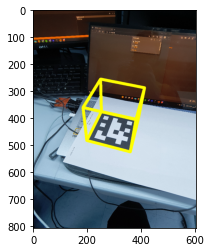

In [34]:
plt.imshow(frame)
cv2.line(frame, (int(imagePoints[0][0][0]),int(imagePoints[0][0][1])), (int(imagePoints[1][0][0]),int(imagePoints[1][0][1])),(255,255,0),10)
cv2.line(frame, (int(imagePoints[1][0][0]),int(imagePoints[1][0][1])), (int(imagePoints[2][0][0]),int(imagePoints[2][0][1])),(255,255,0),10)
cv2.line(frame, (int(imagePoints[2][0][0]),int(imagePoints[2][0][1])), (int(imagePoints[3][0][0]),int(imagePoints[3][0][1])),(255,255,0),10)
cv2.line(frame, (int(imagePoints[3][0][0]),int(imagePoints[3][0][1])), (int(imagePoints[0][0][0]),int(imagePoints[0][0][1])),(255,255,0),10)
cv2.line(frame, (int(imagePoints[0][0][0]),int(imagePoints[0][0][1])), (int(imagePoints[4][0][0]),int(imagePoints[4][0][1])),(255,255,0),10)
cv2.line(frame, (int(imagePoints[1][0][0]),int(imagePoints[1][0][1])), (int(imagePoints[5][0][0]),int(imagePoints[5][0][1])),(255,255,0),10)
cv2.line(frame, (int(imagePoints[2][0][0]),int(imagePoints[2][0][1])), (int(imagePoints[6][0][0]),int(imagePoints[6][0][1])),(255,255,0),10)
cv2.line(frame, (int(imagePoints[3][0][0]),int(imagePoints[3][0][1])), (int(imagePoints[7][0][0]),int(imagePoints[7][0][1])),(255,255,0),10)
cv2.line(frame, (int(imagePoints[4][0][0]),int(imagePoints[4][0][1])), (int(imagePoints[5][0][0]),int(imagePoints[5][0][1])),(255,255,0),10)
cv2.line(frame, (int(imagePoints[5][0][0]),int(imagePoints[5][0][1])), (int(imagePoints[6][0][0]),int(imagePoints[6][0][1])),(255,255,0),10)
cv2.line(frame, (int(imagePoints[6][0][0]),int(imagePoints[6][0][1])), (int(imagePoints[7][0][0]),int(imagePoints[7][0][1])),(255,255,0),10)
cv2.line(frame, (int(imagePoints[7][0][0]),int(imagePoints[7][0][1])), (int(imagePoints[4][0][0]),int(imagePoints[4][0][1])),(255,255,0),10)

plt.imshow(frame)

In [35]:
cv2.imshow('image', frame)
cv2.waitKey(0)

-1

In [36]:
# Calculates Rotation Matrix given euler angles.
def eulerAnglesToRotationMatrix(theta) :

    R_x = np.array([[1,         0,                  0                   ],
                    [0,         math.cos(theta[0]), -math.sin(theta[0]) ],
                    [0,         math.sin(theta[0]), math.cos(theta[0])  ]
                    ])

    R_y = np.array([[math.cos(theta[1]),    0,      math.sin(theta[1])  ],
                    [0,                     1,      0                   ],
                    [-math.sin(theta[1]),   0,      math.cos(theta[1])  ]
                    ])

    R_z = np.array([[math.cos(theta[2]),    -math.sin(theta[2]),    0],
                    [math.sin(theta[2]),    math.cos(theta[2]),     0],
                    [0,                     0,                      1]
                    ])

    R = np.dot(R_z, np.dot( R_y, R_x ))

    return R